In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


### Data Cleaning

### Null Handling

In [7]:
tr = train.isna().sum()*100/train.shape[0]

In [8]:
tr = tr[tr > 10] #Finding all columns where null values >10%
tr = pd.DataFrame(tr)
tr.index 

Index(['Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
       'Medical_History_24', 'Medical_History_32'],
      dtype='object')

In [9]:
train.drop(columns = ['Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
                      'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
                      'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
                      'Medical_History_24', 'Medical_History_32'] , inplace = True )

In [10]:
tr = train.isnull().sum()*100/train.shape[0] 
tr[tr > 0 ]

Employment_Info_1    0.031997
dtype: float64

In [11]:
train.loc[:,['Employment_Info_1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employment_Info_1  59362 non-null  float64
dtypes: float64(1)
memory usage: 464.0 KB


In [12]:
# For continuous variable
for i in ['Employment_Info_1']:
    train[i].fillna(value = train[i].mean(),inplace = True)

In [13]:
train.isna().sum().sum()

0

### Duplicate Handling

In [15]:
train.duplicated().sum()

0

### Feature Reduction

In [17]:
for i in train.columns:
    tr = train[i].nunique()
    print(f'{i} =',tr)

Id = 59381
Product_Info_1 = 2
Product_Info_2 = 19
Product_Info_3 = 34
Product_Info_4 = 1491
Product_Info_5 = 2
Product_Info_6 = 2
Product_Info_7 = 3
Ins_Age = 65
Ht = 39
Wt = 300
BMI = 3256
Employment_Info_1 = 1937
Employment_Info_2 = 36
Employment_Info_3 = 2
Employment_Info_5 = 2
InsuredInfo_1 = 3
InsuredInfo_2 = 2
InsuredInfo_3 = 11
InsuredInfo_4 = 2
InsuredInfo_5 = 2
InsuredInfo_6 = 2
InsuredInfo_7 = 2
Insurance_History_1 = 2
Insurance_History_2 = 3
Insurance_History_3 = 3
Insurance_History_4 = 3
Insurance_History_7 = 3
Insurance_History_8 = 3
Insurance_History_9 = 3
Family_Hist_1 = 3
Medical_History_2 = 579
Medical_History_3 = 3
Medical_History_4 = 2
Medical_History_5 = 3
Medical_History_6 = 3
Medical_History_7 = 3
Medical_History_8 = 3
Medical_History_9 = 3
Medical_History_11 = 3
Medical_History_12 = 3
Medical_History_13 = 3
Medical_History_14 = 3
Medical_History_16 = 3
Medical_History_17 = 3
Medical_History_18 = 3
Medical_History_19 = 3
Medical_History_20 = 3
Medical_History_21 =

In [18]:
for i in train.columns:
    tr = train[i].unique()
    print(f'{i} =',tr)

Id = [    2     5     6 ... 79144 79145 79146]
Product_Info_1 = [1 2]
Product_Info_2 = ['D3' 'A1' 'E1' 'D4' 'D2' 'A8' 'A2' 'D1' 'A7' 'A6' 'A3' 'A5' 'C4' 'C1'
 'B2' 'C3' 'C2' 'A4' 'B1']
Product_Info_3 = [10 26 21 31 29 37 15 36  8  4 30 11 23 28 13  9  6 33 32  3 18  2 22 17
 38 19 34 12 24 20  1 16  5 27]
Product_Info_4 = [0.07692308 0.48717949 0.23076923 ... 0.10993846 0.75393128 0.10024923]
Product_Info_5 = [2 3]
Product_Info_6 = [1 3]
Product_Info_7 = [1 3 2]
Ins_Age = [0.64179104 0.05970149 0.02985075 0.1641791  0.41791045 0.50746269
 0.37313433 0.6119403  0.52238806 0.55223881 0.53731343 0.29850746
 0.56716418 0.2238806  0.32835821 0.62686567 0.20895522 0.26865672
 0.3880597  0.17910448 0.13432836 0.49253731 0.58208955 0.28358209
 0.01492537 0.44776119 0.74626866 0.59701492 0.70149254 0.40298508
 0.46268657 0.47761194 0.68656716 0.19402985 0.23880597 0.11940299
 0.04477612 0.67164179 0.10447761 0.79104478 0.43283582 0.25373134
 0.31343284 0.65671642 0.71641791 0.08955224 0.8358209

In [19]:
train.drop(columns = ['Id'],inplace = True)

In [20]:
train.shape , test.shape

((59381, 115), (19765, 127))

### Correlation Check

In [22]:
corr = train.select_dtypes(['float','int']).corr(method='kendall')

In [23]:
corr.shape

(114, 114)

### Top positive correlated columns

In [25]:
corr.loc[:,['Response']].sort_values(by = 'Response').tail(11)

,Response
InsuredInfo_1,0.089190
Medical_History_33,0.105770
Medical_History_40,0.106790
Medical_History_13,0.110059
Medical_History_6,0.140626
InsuredInfo_6,0.142651
Medical_History_39,0.184618
Product_Info_4,0.192507
Medical_History_4,0.249920
Medical_History_23,0.275150


### Top Negative correlated columns

In [42]:
corr.loc[:,['Response']].sort_values(by = 'Response',ascending = False).tail(10)

,Response
Medical_Keyword_25,-0.102080
Medical_History_30,-0.103826
Medical_Keyword_23,-0.106118
Medical_History_16,-0.125034
Medical_Keyword_48,-0.140990
Ins_Age,-0.161313
Medical_Keyword_3,-0.212343
Medical_Keyword_15,-0.255413
Wt,-0.299670
BMI,-0.323511


In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [44]:
null = corr[(corr >= 0.80) | (corr <= -0.80)]
null

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Product_Info_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [45]:
null.loc[['Insurance_History_3','Insurance_History_4','Insurance_History_7','Insurance_History_9','Medical_History_6','Medical_History_23','Medical_History_25',
'Medical_History_33','Medical_History_36','Medical_History_37','Medical_Keyword_11','Medical_Keyword_15','Medical_Keyword_48'],['Insurance_History_3','Insurance_History_4','Insurance_History_7','Insurance_History_9','Medical_History_6','Medical_History_23','Medical_History_25',
'Medical_History_33','Medical_History_36','Medical_History_37','Medical_Keyword_11','Medical_Keyword_15','Medical_Keyword_48']]

,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_9,Medical_History_6,Medical_History_23,Medical_History_25,Medical_History_33,Medical_History_36,Medical_History_37,Medical_Keyword_11,Medical_Keyword_15,Medical_Keyword_48
Insurance_History_3,1.000000,-0.911449,-0.951091,-0.988851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance_History_4,-0.911449,1.000000,0.852600,0.907013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance_History_7,-0.951091,0.852600,1.000000,0.945137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance_History_9,-0.988851,0.907013,0.945137,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical_History_6,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.992878
Medical_History_23,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-0.864048,NaN
Medical_History_25,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.968674,NaN,NaN,NaN,NaN
Medical_History_33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Medical_History_36,NaN,NaN,NaN,NaN,NaN,NaN,0.968674,NaN,1.000000,NaN,NaN,NaN,NaN
Medical_History_37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.950086,NaN,NaN


In [46]:
train.drop(columns = ['Insurance_History_3','Insurance_History_7','Medical_History_6','Medical_History_23','Medical_History_25','Medical_History_37'],
           inplace = True)

In [47]:
train.shape

(59381, 109)

### Outlier identification and handling

In [49]:
def plot_(x):
    x.plot(kind = 'box')
    plt.show()

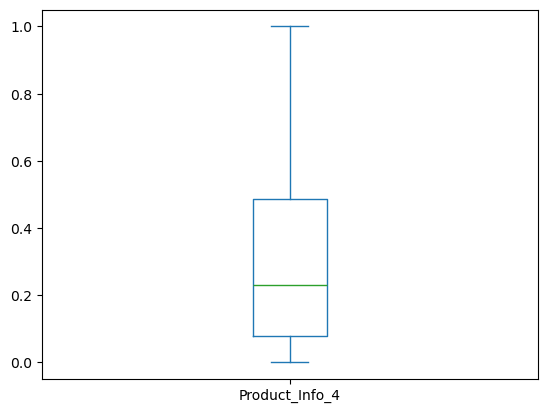

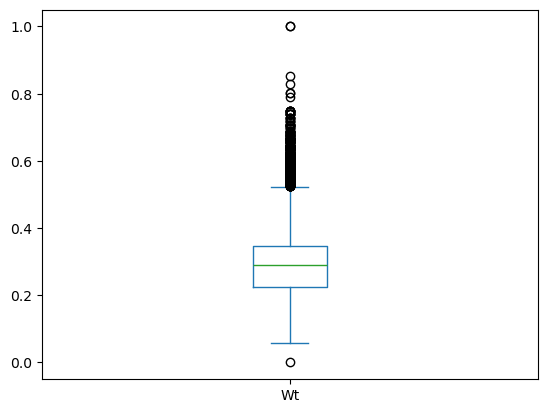

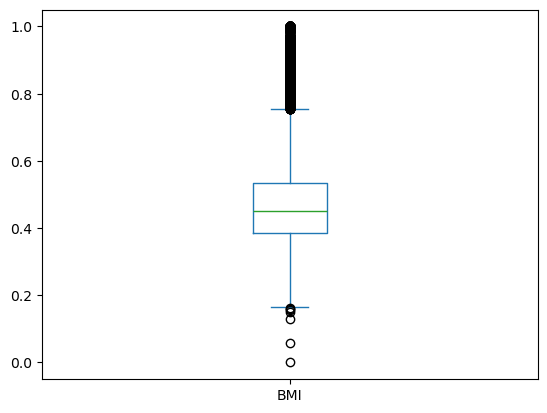

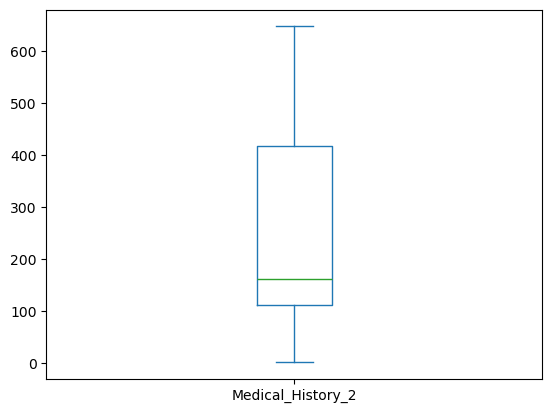

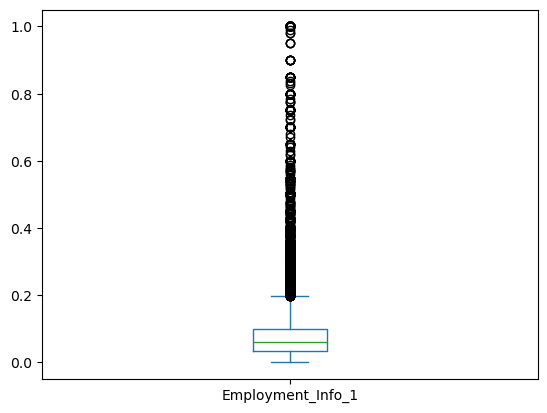

Product_Info_4       None
Wt                   None
BMI                  None
Medical_History_2    None
Employment_Info_1    None
dtype: object

In [50]:
train.loc[:,['Product_Info_4','Wt','BMI','Medical_History_2','Employment_Info_1',]].apply(plot_)

In [51]:
def outlier_treat(df):
    col = ['Wt','BMI','Employment_Info_1',]
    for i in col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        lc = q1-1.5*iqr
        uc = q3+1.5*iqr

        df[i]=np.where(df[i]<lc,lc,df[i])
        df[i]=np.where(df[i]>uc,uc,df[i])

    return df

In [52]:
train = outlier_treat(train)

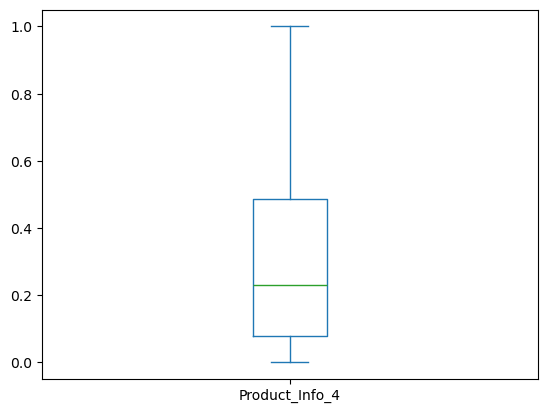

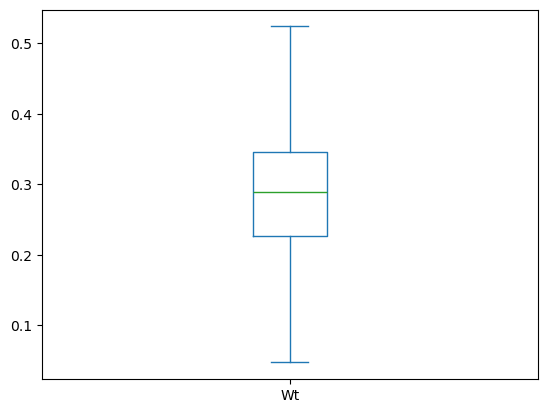

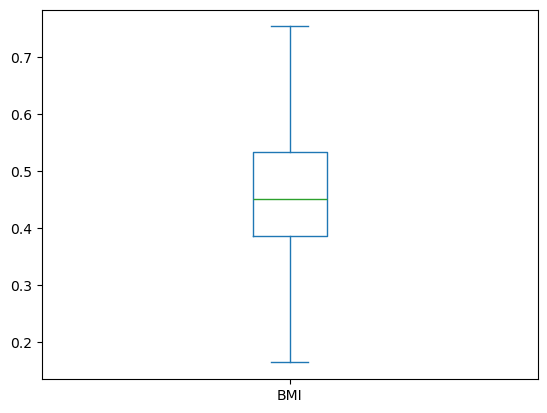

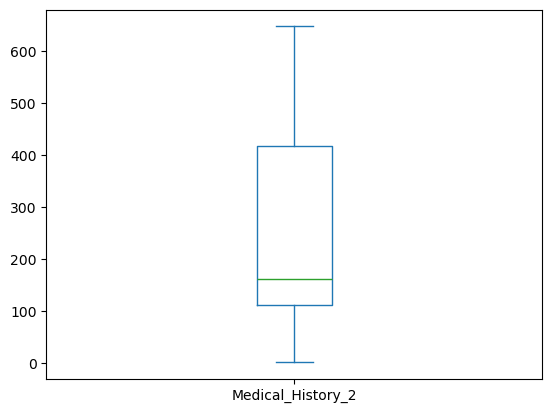

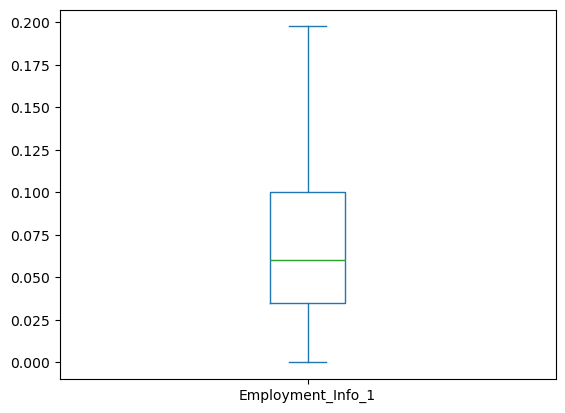

Product_Info_4       None
Wt                   None
BMI                  None
Medical_History_2    None
Employment_Info_1    None
dtype: object

In [53]:
train.loc[:,['Product_Info_4','Wt','BMI','Medical_History_2','Employment_Info_1',]].apply(plot_)

### Converting categorical columns into continuous

In [55]:
train.dtypes

Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_5        int64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_4      int64
Insurance_History_8      int64
Insurance_History_9      int64
Family_Hist_1            int64
Medical_History_2        int64
Medical_History_3        int64
Medical_History_4        int64
Medical_History_5        int64
Medical_

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label = {}
for i in train.select_dtypes('object'):
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i])
    d1 = dict(zip(le.classes_,sorted(train[i].unique())))
    label.update(d1)

### Distribution of Target Variable

In [59]:
train['Response'].value_counts()

Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64

<Axes: xlabel='Response', ylabel='count'>

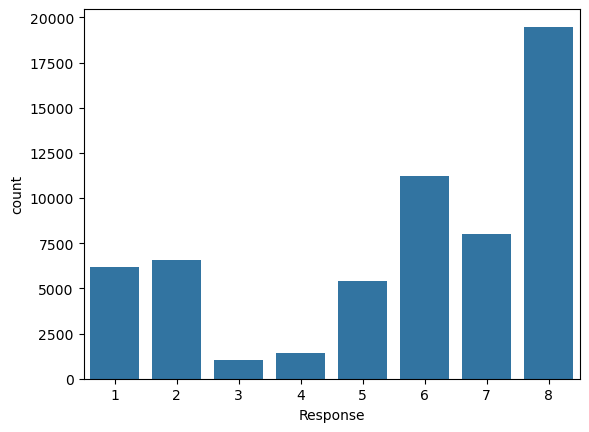

In [60]:
sns.countplot(x=train['Response'])

In [61]:
train.head(2)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_4,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,3,1,2,6,3,1,2,1,1,1,1,1,2,2,112,2,1,1,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,3,1,3,2,3,1,3,1,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,2,1,2,6,3,1,2,1,2,1,1,3,2,2,412,2,1,1,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,3,1,3,2,3,3,1,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


### Seprating 'x' variable & 'y' variable

In [63]:
y = train.loc[:,['Response']]
x = train.iloc[:,:-1]

In [64]:
x.head(2)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_4,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,3,1,2,6,3,1,2,1,1,1,1,1,2,2,112,2,1,1,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,3,1,3,2,3,1,3,1,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,2,1,2,6,3,1,2,1,2,1,1,3,2,2,412,2,1,1,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,3,1,3,2,3,3,1,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data Standardization

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss = StandardScaler()
x1 = ss.fit_transform(x)
x1 = pd.DataFrame(x1)
x1.columns = x.columns
x1.head(2)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_4,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,-0.164525,0.645257,-2.841731,-0.891949,-0.083689,-2.264385,-0.149284,1.197962,-1.690031,-1.658870,-1.254063,-0.836776,0.79445,-0.420829,2.448480,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,-1.634368,-0.169414,-1.013721,-1.388458,-0.822964,-1.420309,-0.794913,-0.337091,-1.377491,-0.085709,-0.071228,-0.151323,-1.828718,0.064649,-0.244864,0.362135,0.159109,2.259754,0.149843,-0.237045,-0.188428,0.122931,-0.349505,0.136745,0.485769,0.100114,-0.26821,0.544473,-0.20581,0.086178,-3.039135,0.429066,-0.0322,-0.434938,-0.069812,0.304099,0.128359,1.455973,-0.209383,-0.094989,-0.22766,-0.121511,-0.093259,-0.112948,-0.11877,-0.102552,-0.081832,-0.194523,-0.24817,-0.10052,-0.077442,-0.088936,-0.485054,-0.113482,-0.096156,-0.086894,-0.096867,-0.090557,-0.121725,-0.196473,-0.329198,-0.138776,-0.31344,-0.116712,-0.109535,-0.123142,-0.109062,-0.160265,-0.104956,-0.147058,-0.15287,-0.145195,-0.083587,-0.102552,-0.26709,-0.082972,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
1,-0.164525,-2.309031,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.753982,-1.445119,-1.852708,-1.695697,-1.386233,-1.80784,2.376264,-0.408417,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,0.611857,-0.169414,-1.013721,1.260049,-0.822964,-1.420309,0.884633,-0.337091,-1.377491,-0.085709,-0.071228,-0.151323,-1.828718,0.064649,-0.244864,0.362135,0.159109,-0.442540,0.149843,-0.237045,-0.188428,0.122931,-0.349505,0.136745,0.485769,0.100114,-0.26821,0.544473,-0.20581,0.086178,0.329041,-2.330870,-0.0322,-0.434938,-0.069812,0.304099,0.128359,-0.686839,-0.209383,-0.094989,-0.22766,-0.121511,-0.093259,-0.112948,-0.11877,-0.102552,-0.081832,-0.194523,-0.24817,-0.10052,-0.077442,-0.088936,-0.485054,-0.113482,-0.096156,-0.086894,-0.096867,-0.090557,-0.121725,-0.196473,-0.329198,-0.138776,-0.31344,-0.116712,-0.109535,-0.123142,-0.109062,-0.160265,-0.104956,-0.147058,-0.15287,-0.145195,-0.083587,-0.102552,-0.26709,-0.082972,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.24007

### Train & Test split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train['Response'].value_counts()/train.shape[0] #Imbalanced Dataset

Response
8    0.328203
6    0.189168
7    0.135178
2    0.110338
1    0.104528
5    0.091477
4    0.024048
3    0.017059
Name: count, dtype: float64

In [568]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.2,stratify=y,random_state=20)

In [548]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((47504, 108), (11877, 108), (47504, 1), (11877, 1))

### Model Training

### Model-01 With Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [77]:
pred = lr.predict(xtest)

In [147]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report

In [79]:
acc1 = accuracy_score(ytest,pred)
print(acc1)

0.48901237686284416


In [113]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       0.38      0.27      0.31      1241
           2       0.38      0.22      0.28      1310
           3       0.13      0.01      0.03       203
           4       0.16      0.05      0.07       286
           5       0.40      0.30      0.34      1086
           6       0.37      0.43      0.40      2247
           7       0.44      0.26      0.33      1606
           8       0.60      0.89      0.72      3898

    accuracy                           0.49     11877
   macro avg       0.36      0.30      0.31     11877
weighted avg       0.45      0.49      0.45     11877



### Model-02 With Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
# Checking accuracy score at diffrent-diffrent depth
accuracy_scores = []
max_depths = []

for i in range(20, 1, -1):
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(xtrain, ytrain)
    pred1 = rf.predict(xtest)
    
    acc = accuracy_score(ytest, pred1)
    
    accuracy_scores.append(acc)
    max_depths.append(i)

In [126]:
accuracy_scores,max_depths

([0.5335522438326177,
  0.532457691336196,
  0.5337206365243748,
  0.5319525132609245,
  0.5325418876820746,
  0.5312789424938957,
  0.5278268923128736,
  0.5268165361623306,
  0.5283320703881451,
  0.5156184221604783,
  0.511997979287699,
  0.5013050433611181,
  0.48993853666750864,
  0.47149953692009766,
  0.45348151890207966,
  0.42561252841626673,
  0.4056579944430412,
  0.39883809042687546,
  0.3652437484213185],
 [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2])

In [115]:
rf = RandomForestClassifier(max_depth=20)
rf.fit(xtrain, ytrain)
pred1 = rf.predict(xtest)

In [116]:
acc2 = accuracy_score(ytest, pred1)
acc2

0.5372568830512756

### Model-03 Grid Search With Random Forest

In [117]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [118]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid={})
grid_search.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid={})

In [119]:
best_model = grid_search.best_estimator_

In [120]:
pred = best_model.predict(xtest)

In [121]:
acc3 = accuracy_score(ytest,pred)
acc3

0.5331312621032247

### Model-04 Logistic Regression With Random Sampling

In [126]:
train['Response'].value_counts()

Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64

In [127]:
A = train[train['Response'] == 8 ]
B = train[train['Response'] == 7 ]
C = train[train['Response'] == 6 ]
D = train[train['Response'] == 5 ]
E = train[train['Response'] == 4 ]
F = train[train['Response'] == 3 ]
G = train[train['Response'] == 2 ]
H = train[train['Response'] == 1 ]

In [128]:
print(A.shape , B.shape , C.shape , D.shape , E.shape , F.shape , G.shape , H.shape)

(19489, 109) (8027, 109) (11233, 109) (5432, 109) (1428, 109) (1013, 109) (6552, 109) (6207, 109)


In [129]:
A = A.sample(1013)
B = B.sample(1013)
C = C.sample(1013)
D = D.sample(1013)
E = E.sample(1013)
F = F.sample(1013)
G = G.sample(1013)
H = H.sample(1013)

In [130]:
train1 = pd.concat([A,B,C,D,E,F,G,H]).reset_index(drop = True)

In [131]:
train1['Response'].value_counts()

Response
8    1013
7    1013
6    1013
5    1013
4    1013
3    1013
2    1013
1    1013
Name: count, dtype: int64

In [132]:
y = train1.loc[:,['Response']]
x = train1.iloc[:,:-1]

In [133]:
ss = StandardScaler()
x1 = ss.fit_transform(x)
x1 = pd.DataFrame(x1)
x1.columns = x.columns
x1.head(2)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_4,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,5.904101,0.868457,0.280876,-0.199926,-0.085637,-2.346063,-0.146818,0.427244,0.725532,-0.407429,-0.888882,1.396702,0.084673,-0.435305,-0.389813,-0.465332,-0.101724,0.802950,-2.672962,-0.134975,-0.793267,-0.162304,0.606626,-0.178044,1.088277,-0.061016,1.118862,-1.365818,-0.794098,-0.324719,-1.029812,-0.091304,5.257470,-3.519719,0.535116,0.069643,-0.251194,0.388763,-4.696928,-0.451841,0.150718,-0.250919,-0.183144,0.125164,-0.352792,0.145939,0.489992,0.102955,-0.281748,-1.816999,-0.201433,0.08992,-2.677565,0.43811,-0.038509,-0.438958,-0.073036,0.318647,0.144165,-0.662704,-0.21561,-0.09985,-0.245877,-0.117304,-0.099218,-0.108911,-0.118916,-0.107158,-0.083416,-0.195726,-0.254234,-0.111775,-0.083416,-0.081903,-0.537024,-0.114018,-0.098582,-0.08922,-0.099218,-0.086365,8.564381,-0.198429,2.682189,-0.143718,-0.322859,-0.113461,-0.107158,-0.125164,-0.115672,-0.156194,-0.10949,-0.148563,-0.165085,-0.152845,-0.087088,-0.10949,-0.27816,-0.083416,-0.118381,-0.26666,-0.083416,-0.228759,-0.10949,-0.085637,-0.110065,-0.094679,-0.151572,-0.25588
1,-0.169374,0.683359,-3.071436,2.703694,-0.085637,0.426246,-0.146818,-0.023138,-0.737993,-1.140667,-1.002962,1.294423,0.084673,-0.435305,2.565330,-0.465332,-0.101724,-1.082293,0.374117,-0.134975,1.260610,-0.162304,0.606626,-0.178044,1.088277,-0.061016,1.118862,-1.365818,1.253746,-0.324719,0.971051,-0.091304,-0.069013,-0.131289,-1.866093,0.069643,-0.251194,0.388763,0.170579,-0.451841,0.150718,-0.250919,-0.183144,0.125164,-0.352792,0.145939,-2.040851,0.102955,-0.281748,0.550358,-0.201433,0.08992,0.373474,0.43811,-0.038509,1.971146,-0.073036,0.318647,0.144165,-0.662704,-0.21561,-0.09985,-0.245877,-0.117304,-0.099218,-0.108911,-0.118916,-0.107158,-0.083416,-0.195726,-0.254234,-0.111775,-0.083416,-0.081903,-0.537024,-0.114018,-0.098582,-0.08922,-0.099218,-0.086365,-0.116763,-0.198429,-0.372830,-0.143718,-0.322859,-0.113461,-0.107158,-0.125164,-0.115672,-0.156194,-0.10949,-0.148563,-0.165085,-0.152845,-0.087088,-0.10949,-0.27816,-0.083416,-0.118381,-0.26666,-0.083416,-0.228759,-0.10949,-0.085637,-0.110065,-0.094679,-0.151572,-0.25588

In [134]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.2,stratify=y,random_state=20)

In [135]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((6483, 108), (1621, 108), (6483, 1), (1621, 1))

In [136]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [137]:
pred = lr.predict(xtest)

In [138]:
acc4 = accuracy_score(ytest,pred)
print(acc4)

0.37322640345465763


### Model-05 Random Forest With Random Sampling

In [140]:
rf = RandomForestClassifier(max_depth=20)
rf.fit(xtrain, ytrain)
pred1 = rf.predict(xtest)

In [141]:
acc5 = accuracy_score(ytest, pred1)
acc5

0.42381246144355333

### Model-06 Logistic Regression With PCA

In [143]:
y = train.loc[:,['Response']]
x = train.iloc[:,:-1]

In [144]:
ss = StandardScaler()
x1 = ss.fit_transform(x)
x1 = pd.DataFrame(x1)
x1.columns = x.columns
x1.head(2)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_4,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,-0.164525,0.645257,-2.841731,-0.891949,-0.083689,-2.264385,-0.149284,1.197962,-1.690031,-1.658870,-1.254063,-0.836776,0.79445,-0.420829,2.448480,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,-1.634368,-0.169414,-1.013721,-1.388458,-0.822964,-1.420309,-0.794913,-0.337091,-1.377491,-0.085709,-0.071228,-0.151323,-1.828718,0.064649,-0.244864,0.362135,0.159109,2.259754,0.149843,-0.237045,-0.188428,0.122931,-0.349505,0.136745,0.485769,0.100114,-0.26821,0.544473,-0.20581,0.086178,-3.039135,0.429066,-0.0322,-0.434938,-0.069812,0.304099,0.128359,1.455973,-0.209383,-0.094989,-0.22766,-0.121511,-0.093259,-0.112948,-0.11877,-0.102552,-0.081832,-0.194523,-0.24817,-0.10052,-0.077442,-0.088936,-0.485054,-0.113482,-0.096156,-0.086894,-0.096867,-0.090557,-0.121725,-0.196473,-0.329198,-0.138776,-0.31344,-0.116712,-0.109535,-0.123142,-0.109062,-0.160265,-0.104956,-0.147058,-0.15287,-0.145195,-0.083587,-0.102552,-0.26709,-0.082972,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
1,-0.164525,-2.309031,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.753982,-1.445119,-1.852708,-1.695697,-1.386233,-1.80784,2.376264,-0.408417,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,0.611857,-0.169414,-1.013721,1.260049,-0.822964,-1.420309,0.884633,-0.337091,-1.377491,-0.085709,-0.071228,-0.151323,-1.828718,0.064649,-0.244864,0.362135,0.159109,-0.442540,0.149843,-0.237045,-0.188428,0.122931,-0.349505,0.136745,0.485769,0.100114,-0.26821,0.544473,-0.20581,0.086178,0.329041,-2.330870,-0.0322,-0.434938,-0.069812,0.304099,0.128359,-0.686839,-0.209383,-0.094989,-0.22766,-0.121511,-0.093259,-0.112948,-0.11877,-0.102552,-0.081832,-0.194523,-0.24817,-0.10052,-0.077442,-0.088936,-0.485054,-0.113482,-0.096156,-0.086894,-0.096867,-0.090557,-0.121725,-0.196473,-0.329198,-0.138776,-0.31344,-0.116712,-0.109535,-0.123142,-0.109062,-0.160265,-0.104956,-0.147058,-0.15287,-0.145195,-0.083587,-0.102552,-0.26709,-0.082972,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.24007

In [145]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components=30) 
x2 = pca.fit_transform(x1)

In [147]:
x2 = pd.DataFrame(x2)

In [148]:
x2.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.980347,2.442363,-0.070996,-3.074436,-0.906505,-2.790535,0.082586,-0.649214,0.204642,-0.112986,0.836197,-1.401498,-0.290089,0.757226,0.321675,1.009069,-0.694422,0.883046,-0.870555,-0.257265,0.894752,-1.360263,1.410277,-0.711009,-0.737455,-0.765389,-0.375181,-0.194208,-1.227076,-0.489033
1,-0.800823,2.780010,-0.081891,-0.695441,-0.681740,-1.105910,-0.514547,0.868261,0.026904,-0.090286,0.406141,-0.199967,0.421722,0.588984,-0.816678,0.817799,-0.051216,-0.585638,1.730356,-0.239994,0.236865,2.020206,-1.371560,0.473351,0.181499,-0.516638,-0.332276,0.079066,-0.063772,-0.777429


In [149]:
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,stratify=y,random_state=20)

In [498]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((47504, 108), (11877, 108), (47504, 1), (11877, 1))

In [151]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [152]:
pred = lr.predict(xtest)

In [153]:
acc6 = accuracy_score(ytest,pred)
acc6

0.43824198029805506

### Model-07 Random Forest With PCA

In [155]:
rf = RandomForestClassifier(max_depth=20)
rf.fit(xtrain, ytrain)
pred1 = rf.predict(xtest)

In [156]:
acc7 = accuracy_score(ytest, pred1)
acc7

0.45280794813505093

### Model-08 Grid Search With PCA & Random Forest

In [158]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [159]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid={})
grid_search.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid={})

In [160]:
best_model = grid_search.best_estimator_

In [161]:
pred = best_model.predict(xtest)

In [162]:
acc8 = accuracy_score(ytest,pred)
acc8

0.44817714911172857

### On the basis of Domain Knowledge

In [164]:
A = train.drop(columns = ['Product_Info_2','Product_Info_1','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7','Family_Hist_1'])
A.head(2)

,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_4,Insurance_History_8,Insurance_History_9,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,0.641791,0.581818,0.148536,0.323008,0.028,12,1,3,1,2,6,3,1,2,1,1,1,1,1,2,112,2,1,1,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,3,1,3,2,3,1,3,1,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,2,1,2,6,3,1,2,1,2,1,1,3,2,412,2,1,1,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,3,1,3,2,3,3,1,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [165]:
B = A.drop(columns = ['Employment_Info_1','Employment_Info_2','Employment_Info_3','Employment_Info_5','Insurance_History_1','Insurance_History_2',
                      'Insurance_History_4','Insurance_History_8','Insurance_History_9'])
B.head(2)

,Ins_Age,Ht,Wt,BMI,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,0.641791,0.581818,0.148536,0.323008,1,2,6,3,1,2,1,112,2,1,1,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,3,1,3,2,3,1,3,1,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0.059701,0.600000,0.131799,0.272288,1,2,6,3,1,2,1,412,2,1,1,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,3,1,3,2,3,3,1,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [166]:
C = B.drop(columns = ['Medical_History_2','Medical_History_3','Medical_History_4','Medical_History_5','Medical_History_7','Medical_History_8','Medical_History_9','Medical_History_11',
                      'Medical_History_12','Medical_History_13','Medical_History_14','Medical_History_16','Medical_History_17','Medical_History_18',
                       'Medical_History_19','Medical_History_20','Medical_History_21','Medical_History_22'])
C.head(2)

,Ins_Age,Ht,Wt,BMI,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,0.641791,0.581818,0.148536,0.323008,1,2,6,3,1,2,1,3,3,1,3,2,3,1,3,1,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0.059701,0.600000,0.131799,0.272288,1,2,6,3,1,2,1,3,3,1,3,2,3,3,1,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [167]:
train1 = C.drop(columns = ['Medical_History_26','Medical_History_27','Medical_History_28','Medical_History_29','Medical_History_30','Medical_History_31',
                       'Medical_History_33','Medical_History_34','Medical_History_35','Medical_History_36','Medical_History_38',
                       'Medical_History_39','Medical_History_40','Medical_History_41'])
train1.head(2)

,Ins_Age,Ht,Wt,BMI,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,0.641791,0.581818,0.148536,0.323008,1,2,6,3,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0.059701,0.600000,0.131799,0.272288,1,2,6,3,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [168]:
train1.shape

(59381, 60)

In [169]:
y = train1.loc[:,['Response']]
x = train1.iloc[:,:-1]

In [170]:
x.shape,y.shape

((59381, 59), (59381, 1))

In [171]:
ss = StandardScaler()
x1 = ss.fit_transform(x)
x1 = pd.DataFrame(x1)
x1.columns = x.columns
x1.head(2)

,Ins_Age,Ht,Wt,BMI,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1.197962,-1.690031,-1.658870,-1.254063,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,-0.209383,-0.094989,-0.22766,-0.121511,-0.093259,-0.112948,-0.11877,-0.102552,-0.081832,-0.194523,-0.24817,-0.10052,-0.077442,-0.088936,-0.485054,-0.113482,-0.096156,-0.086894,-0.096867,-0.090557,-0.121725,-0.196473,-0.329198,-0.138776,-0.31344,-0.116712,-0.109535,-0.123142,-0.109062,-0.160265,-0.104956,-0.147058,-0.15287,-0.145195,-0.083587,-0.102552,-0.26709,-0.082972,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
1,-1.753982,-1.445119,-1.852708,-1.695697,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,-0.209383,-0.094989,-0.22766,-0.121511,-0.093259,-0.112948,-0.11877,-0.102552,-0.081832,-0.194523,-0.24817,-0.10052,-0.077442,-0.088936,-0.485054,-0.113482,-0.096156,-0.086894,-0.096867,-0.090557,-0.121725,-0.196473,-0.329198,-0.138776,-0.31344,-0.116712,-0.109535,-0.123142,-0.109062,-0.160265,-0.104956,-0.147058,-0.15287,-0.145195,-0.083587,-0.102552,-0.26709,-0.082972,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076


In [172]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.2,stratify=y,random_state=20)

In [173]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((47504, 59), (11877, 59), (47504, 1), (11877, 1))

### Model-09 Logistic with Domain Knowledge

In [175]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [176]:
pred = lr.predict(xtest)

In [177]:
acc9 = accuracy_score(ytest,pred)
acc9

0.46417445482866043

### Model-10 Random Forest with Domain Knowledge

In [179]:
rf = RandomForestClassifier(max_depth=20)
rf.fit(xtrain, ytrain)
pred1 = rf.predict(xtest)

In [180]:
acc10 = accuracy_score(ytest, pred1)
acc10

0.4839605961101288

### VIF Factor

In [182]:
train1 = train.copy()

In [183]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [184]:
train1 = sm.add_constant(train1)
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["features"] = train1.columns
vif["VIF Factor"] = [variance_inflation_factor(train1.values, i) for i in range(train1.shape[1])]
vif
# Generally less than 5 VIF is more acceptable

,features,VIF Factor
0,const,13293.460475
1,Product_Info_1,1.030434
2,Product_Info_2,1.195326
3,Product_Info_3,2.633470
4,Product_Info_4,1.496314
5,Product_Info_5,1.014510
6,Product_Info_6,1.053618
7,Product_Info_7,1.015886
8,Ins_Age,1.842250
9,Ht,22.850683


In [185]:
train1 = train.drop(columns = ['Ht','Wt','BMI','Insurance_History_1','Insurance_History_4','Insurance_History_8','Insurance_History_9',
                               'Medical_History_13','Medical_History_26','Medical_History_33','Medical_History_36','Medical_Keyword_23',])

In [186]:
train1.head(2)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_2,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_34,Medical_History_35,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,16,10,0.076923,2,1,1,0.641791,0.028,12,1,3,1,2,6,3,1,2,1,1,2,112,2,1,1,2,2,1,3,2,3,3,3,1,1,2,1,2,3,1,3,2,3,3,1,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,0,26,0.076923,2,3,1,0.059701,0.000,1,3,2,1,2,6,3,1,2,1,1,2,412,2,1,1,2,2,1,3,2,3,1,3,1,1,2,1,2,3,1,3,2,3,1,1,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


### Model-11 Logistic with VIF Factor

In [188]:
y = train1.loc[:,['Response']]
x = train1.iloc[:,:-1]

In [189]:
ss = StandardScaler()
x1 = ss.fit_transform(x)
x1 = pd.DataFrame(x1)
x1.columns = x.columns
x1.head(2)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_2,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_34,Medical_History_35,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,-0.164525,0.645257,-2.841731,-0.891949,-0.083689,-2.264385,-0.149284,1.197962,-0.836776,0.79445,-0.420829,2.448480,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,-0.169414,-1.420309,-0.794913,-0.337091,-1.377491,-0.085709,-0.071228,-0.151323,-1.828718,0.064649,-0.244864,0.159109,2.259754,0.149843,-0.237045,-0.188428,0.122931,-0.349505,0.136745,0.100114,-0.26821,0.544473,-0.20581,0.086178,0.429066,-0.0322,-0.069812,0.304099,0.128359,1.455973,-0.209383,-0.094989,-0.22766,-0.121511,-0.093259,-0.112948,-0.11877,-0.102552,-0.081832,-0.194523,-0.24817,-0.10052,-0.077442,-0.088936,-0.485054,-0.113482,-0.096156,-0.086894,-0.096867,-0.090557,-0.121725,-0.196473,-0.138776,-0.31344,-0.116712,-0.109535,-0.123142,-0.109062,-0.160265,-0.104956,-0.147058,-0.15287,-0.145195,-0.083587,-0.102552,-0.26709,-0.082972,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
1,-0.164525,-2.309031,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.753982,-1.386233,-1.80784,2.376264,-0.408417,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,-0.169414,-1.420309,0.884633,-0.337091,-1.377491,-0.085709,-0.071228,-0.151323,-1.828718,0.064649,-0.244864,0.159109,-0.442540,0.149843,-0.237045,-0.188428,0.122931,-0.349505,0.136745,0.100114,-0.26821,0.544473,-0.20581,0.086178,-2.330870,-0.0322,-0.069812,0.304099,0.128359,-0.686839,-0.209383,-0.094989,-0.22766,-0.121511,-0.093259,-0.112948,-0.11877,-0.102552,-0.081832,-0.194523,-0.24817,-0.10052,-0.077442,-0.088936,-0.485054,-0.113482,-0.096156,-0.086894,-0.096867,-0.090557,-0.121725,-0.196473,-0.138776,-0.31344,-0.116712,-0.109535,-0.123142,-0.109062,-0.160265,-0.104956,-0.147058,-0.15287,-0.145195,-0.083587,-0.102552,-0.26709,-0.082972,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076


In [190]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.2,stratify=y,random_state=20)

In [191]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [192]:
pred = lr.predict(xtest)

In [193]:
acc11 = accuracy_score(ytest, pred)
acc11

0.45280794813505093

### Model-12 Random Forest with VIF Factor

In [195]:
rf = RandomForestClassifier(max_depth=20)
rf.fit(xtrain, ytrain)
pred1 = rf.predict(xtest)

In [196]:
acc12 = accuracy_score(ytest, pred1)
acc12

0.4720889113412478

### Model-13 With Decision Tree

In [228]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((47504, 96), (11877, 96), (47504, 1), (11877, 1))

In [229]:
from sklearn.tree import DecisionTreeClassifier

In [230]:
dt = DecisionTreeClassifier()

In [231]:
dt.fit(xtrain,ytrain)
dt_pred = dt.predict(xtest)

In [232]:
acc13 = accuracy_score(ytest, dt_pred)
acc13

0.3228087900985097

### Model-14 With XGBoost

In [234]:
import xgboost

In [235]:
xgb = xgboost.XGBClassifier()

In [236]:
ytrain = ytrain - 1
ytest = ytest - 1

In [237]:
ytrain.value_counts()

Response
7           15591
5            8986
6            6421
1            5242
0            4966
4            4346
3            1142
2             810
Name: count, dtype: int64

In [238]:
xgb.fit(xtrain,ytrain)
xgb_prd = xgb.predict(xtest)

In [239]:
acc14 = accuracy_score(ytest, xgb_prd)
acc14

0.4749515871011198

In [240]:
intercept = xgb.intercept_
intercept

array([0.5], dtype=float32)

In [241]:
coefficients = lr.coef_
coefficients

array([[ 4.77407596e-03, -1.03027793e-04,  2.19466033e-02,
         1.09916380e-01, -2.03627758e-03,  1.71096633e-02,
        -5.20052922e-03,  3.03927026e-01, -1.24562917e-01,
        -1.35356072e-02,  1.52926158e-01, -4.21172971e-02,
         3.24942039e-02,  9.87210188e-02,  1.85722180e-02,
         9.88848454e-03,  1.31461786e-01, -1.92206044e-01,
         9.56889523e-02,  1.40841051e-01,  1.26425669e-02,
        -2.41487671e-02, -2.33756507e-02,  2.55974376e-01,
         8.98111964e-02, -1.12863731e-01, -3.67726073e-02,
        -3.01103903e-02, -5.27042094e-02,  7.91751668e-02,
        -6.47421724e-02,  1.09297062e-02, -9.51408538e-02,
         1.69949179e-01,  1.01656770e-01, -8.13091321e-02,
        -1.15507327e-02, -4.05484694e-02, -9.34089604e-02,
         1.60168033e-01,  3.70776201e-03,  1.79696639e-01,
        -5.32824961e-02, -1.16941000e-02,  1.14599300e-01,
         2.99422827e-02, -1.68093356e-02, -1.64845603e-01,
         1.09885352e-02, -2.40841452e-03, -1.74647305e-0

### Model-15 With KNN Algorithms

In [243]:
from sklearn.neighbors import KNeighborsClassifier

In [247]:
knn = KNeighborsClassifier()

In [315]:
knn.fit(xtrain,ytrain)
knn_pred = knn.predict(xtest)

In [316]:
acc15 = accuracy_score(ytest, knn_pred)
acc15

0.38166203586764336

### Model-16 With SVM Algorithm

In [320]:
from sklearn.svm import SVC

In [322]:
from sklearn import svm

In [324]:
svm = SVC(kernel='sigmoid')
svm.fit(xtrain,ytrain)

SVC(kernel='sigmoid')

In [325]:
svm_pred = svm.predict(xtest)

In [326]:
acc16 = accuracy_score(ytest, svm_pred)
acc16

0.43992590721562685

### Model-17 Logistic With Smote

In [97]:
from imblearn.over_sampling import SMOTE

In [328]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [406]:
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

In [331]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

LogisticRegression()

In [332]:
pred = lr.predict(xtest)

In [333]:
acc17 = accuracy_score(ytest,pred)
acc17

0.41778226824955794

### Model-18 Random Forest With Smote

In [127]:
# Checking accuracy score at diffrent-diffrent depth
accuracy_scores = []
max_depths = []

for i in range(20, 1, -1):
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(xtrain, ytrain)
    pred1 = rf.predict(xtest)
    
    acc = accuracy_score(ytest, pred1)
    
    accuracy_scores.append(acc)
    max_depths.append(i)

In [128]:
accuracy_scores,max_depths

([0.5338048328702534,
  0.5330470657573462,
  0.5325418876820746,
  0.532457691336196,
  0.5313631388397744,
  0.5329628694114675,
  0.5268165361623306,
  0.5272375178917235,
  0.526311358087059,
  0.5183969015744717,
  0.5135977098593921,
  0.5032415593163256,
  0.493137997810895,
  0.4681316830849541,
  0.44228340490022733,
  0.42990654205607476,
  0.411635935000421,
  0.3857876568156942,
  0.3569925065252168],
 [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2])

In [335]:
rf1 = RandomForestClassifier(max_depth=20)
rf1.fit(xtrain, ytrain)
pred2 = rf1.predict(xtest)

In [336]:
acc18 = accuracy_score(ytest, pred2)
acc18

0.5325418876820746

### Model-19 SVM Algorithm With Smote

In [350]:
svm = SVC(kernel='sigmoid')
svm.fit(xtrain,ytrain)

SVC(kernel='sigmoid')

In [351]:
svm_pred = svm.predict(xtest)

In [352]:
acc19 = accuracy_score(ytest, svm_pred)
acc19

0.43992590721562685

### Model-20 XG-Boost With Smote

In [353]:
xgb = xgboost.XGBClassifier()

In [354]:
ytrain = ytrain - 1
ytest = ytest - 1

In [355]:
xgb.fit(xtrain,ytrain)
xgb_prd = xgb.predict(xtest)

In [356]:
acc20 = accuracy_score(ytest, xgb_prd)
acc20

0.5429822345710196

### With Ensemble Voting Classifier

In [375]:
from sklearn.ensemble import VotingClassifier

In [417]:
voting_clf = VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                                          ('xgb', xgboost.XGBClassifier()),
                                          ('lr', LogisticRegression())], voting='soft')

In [419]:
voting_clf.fit(xtrain,ytrain)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [420]:
voting_clf_prd = voting_clf.predict(xtest)

In [421]:
acc21 = accuracy_score(ytest,voting_clf_prd)
acc21

0.5442451797591985

### With Ensemble Stacking Classifier

In [426]:
from sklearn.ensemble import StackingClassifier

In [428]:
stacking_model = StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                                                ('xgb', xgboost.XGBClassifier()),
                                                ('lr', LogisticRegression())],
                                   final_estimator=RandomForestClassifier(random_state=42))

In [430]:
stacking_model.fit(xtrain,ytrain)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              intera...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('lr', LogisticRegression())],
                   final_estimator=RandomForestClassifier(random_state=42))

In [431]:
stacking_model_prd = stacking_model.predict(xtest)

In [432]:
acc22 = accuracy_score(ytest,stacking_model_prd)
acc22

0.5425612528416267

### Accuracy

In [434]:
print(acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,acc11,acc12,acc13,acc14,acc15,acc16,acc17,acc18,acc19,acc20,acc21,acc22)

0.48901237686284416 0.5372568830512756 0.5331312621032247 0.37322640345465763 0.42381246144355333 0.43824198029805506 0.45280794813505093 0.44817714911172857 0.46417445482866043 0.4839605961101288 0.45280794813505093 0.4720889113412478 0.3228087900985097 0.4749515871011198 0.38166203586764336 0.43992590721562685 0.41778226824955794 0.5325418876820746 0.43992590721562685 0.5429822345710196 0.5442451797591985 0.5425612528416267


### Model Table

In [441]:
dict = {'Model':['Model-01','Model-02','Model-03','Model-04','Model-05','Model-06','Model-07','Model-08','Model-09','Model-10','Model-11','Model-12',
                 'Model-13','Model-14','Model-15','Model-16','Model-17','Model-18','Model-19','Model-20','Model-21','Model-22'],
        'Model Name':['Logistic Regression','Random Forest','Grid Search With Random Forest','Logistic Regression With Sampling',
                      'Random Forest With Sampling','Logistic Regression With PCA','Random Forest With PCA','Grid Search With Random Forest',
                      'Logistic Regression With Domain Knowledge','Random Forest With Domain Knowledge','Logistic Regression With VIF Factor','Random Forest With VIF Factor',
                     'Decision Tree','XG Boost','KNN Algorithm','SVM Algorithm','Logistic With Smote','Random With Smote','SVM Algorithm With Smote',
                     'XG-Boost With Smote','Ensemble Voting Classifier','Ensemble Stacking Classifier'],
        'Accuracy':[acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,acc11,acc12,acc13,acc14,acc15,acc16,acc17,acc18,acc19,acc20,acc21,acc22]}

In [443]:
Models = pd.DataFrame(dict)
Models

,Model,Model Name,Accuracy
0,Model-01,Logistic Regression,0.489012
1,Model-02,Random Forest,0.537257
2,Model-03,Grid Search With Random Forest,0.533131
3,Model-04,Logistic Regression With Sampling,0.373226
4,Model-05,Random Forest With Sampling,0.423812
5,Model-06,Logistic Regression With PCA,0.438242
6,Model-07,Random Forest With PCA,0.452808
7,Model-08,Grid Search With Random Forest,0.448177
8,Model-09,Logistic Regression With Domain Knowledge,0.464174
9,Model-10,Random Forest With Domain Knowledge,0.483961


In [445]:
Models.to_csv('Model_Training_Binary.csv', index=False)

### Predicting response for test dataset

In [447]:
test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,0.338912,0.472262,0.150,3,1,0.00,2,0.50,2,2,11,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.627451,0.760563,NaN,2.0,16,2,2,1,3,1,2,2,NaN,3,2,1,3,NaN,1,2,1,1,2,1,2,1,NaN,2,2,1,1,3,2,3,NaN,3,3,1,3,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,0.311715,0.484984,0.000,1,3,0.07,2,0.20,1,2,8,3,1,1,1,1,1,3,1,0.001667,1,1,2,2,NaN,0.529412,0.746479,NaN,5.0,261,3,1,1,3,2,2,1,NaN,3,2,3,3,110.0,3,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,0.320084,0.519103,0.143,9,1,0.00,2,0.45,1,2,3,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.666667,NaN,0.661972,NaN,3.0,132,2,1,1,3,2,2,2,NaN,3,2,3,3,240.0,1,3,1,1,2,1,2,3,NaN,2,2,3,1,1,2,3,NaN,1,3,1,3,2,1,3,3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,0.486962,0.210,9,1,0.00,2,1.00,2,2,3,3,1,1,1,1,1,3,1,0.000667,2,1,2,2,NaN,0.686275,0.676056,NaN,NaN,162,3,2,1,1,2,3,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,2,3,2,3,NaN,3,1,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,0.428718,0.085,9,1,0.00,2,0.20,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.449275,NaN,0.380282,NaN,18.0,181,3,1,1,3,2,2,2,NaN,3,2,3,3,188.0,1,3,1,1,2,1,2,1,NaN,1,3,3,1,1,2,3,NaN,3,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [449]:
test.drop(columns = ['Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
                      'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
                      'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
                      'Medical_History_24', 'Medical_History_32'] , inplace = True )

In [451]:
test.Employment_Info_1 = test.Employment_Info_1.fillna(value = 0)

In [453]:
test.isnull().sum().sum()

0

In [455]:
test.duplicated().sum()

0

In [457]:
test1 = test.drop(columns = ['Id'])

In [459]:
test1.drop(columns = ['Insurance_History_3','Insurance_History_7','Medical_History_6','Medical_History_23','Medical_History_25','Medical_History_37'],
           inplace = True)

In [461]:
def outlier_treat(df):
    col = ['Wt','BMI','Employment_Info_1',]
    for i in col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        lc = q1-1.5*iqr
        uc = q3+1.5*iqr

        df[i]=np.where(df[i]<lc,lc,df[i])
        df[i]=np.where(df[i]>uc,uc,df[i])

    return df

In [463]:
test1 = outlier_treat(test1)

In [467]:
label = {}
for i in test1.select_dtypes('object'):
    le = LabelEncoder()
    test1[i] = le.fit_transform(test1[i])
    d3 = dict(zip(le.classes_,sorted(test1[i].unique())))
    label.update(d3)

In [469]:
ss = StandardScaler()
x1 = ss.fit_transform(test1)
x1 = pd.DataFrame(x1)
x1.columns = test1.columns
x1.head(2)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_4,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,-0.160107,0.689836,0.323694,0.582605,-0.081053,0.455969,-0.148952,0.980332,1.019821,0.546103,0.035095,1.523200,-1.299480,-0.440913,-0.41852,1.921044,-0.086266,1.782152,0.346806,-0.123514,-0.852617,-0.129904,0.644850,-0.159107,1.145177,-0.048766,1.176838,0.647524,-1.313903,-0.415678,0.719756,-0.086859,-5.901672,-0.151528,0.537555,0.063425,-0.238172,-2.751904,0.157064,-0.439439,-6.627251,-0.236872,-0.188329,0.119878,-0.346989,0.125816,-2.042727,-10.245905,-0.270545,0.532842,-0.209763,0.083238,0.335694,0.417309,-0.034687,1.976434,-0.071324,0.308686,0.12488,1.436947,-0.213026,-0.088034,-0.236388,-0.119222,-0.089481,-0.116128,-0.110869,-0.101869,-0.087448,-0.195833,-0.254578,-0.088325,-0.089481,-0.092589,2.009536,-0.107066,-0.102375,-0.083852,10.736140,-0.087154,-0.124146,-0.202559,-0.335717,-0.140946,2.920598,-0.115004,-0.105606,-0.123725,-0.103629,-0.158437,-0.106095,-0.141319,-0.157597,-0.138689,-0.081996,-0.107066,-0.265664,-0.083852,-0.119004,-0.246596,-0.105851,-0.217656,-0.10085,-0.091189,-0.117242,-0.093143,-0.13659,-0.244278
1,-0.160107,-1.905948,0.323694,-0.885576,-0.081053,0.455969,-0.148952,1.054591,0.287620,0.232874,0.145045,-1.395593,-1.776913,2.268022,-0.41852,-0.492625,-0.086266,0.774229,0.346806,-0.123514,-0.852617,-0.129904,-1.550749,-0.159107,-0.969004,-1.351272,-0.779938,-1.426084,0.062973,2.405708,-1.389359,-0.086859,-0.073424,-0.151528,-1.860274,0.063425,-0.238172,0.363474,0.157064,2.275630,0.150892,-0.236872,-0.188329,0.119878,-0.346989,0.125816,-2.042727,0.097864,-0.270545,0.532842,-0.209763,0.083238,0.335694,0.417309,-0.034687,1.976434,-0.071324,0.308686,0.12488,-0.695920,-0.213026,-0.088034,-0.236388,-0.119222,-0.089481,-0.116128,-0.110869,-0.101869,-0.087448,-0.195833,-0.254578,-0.088325,-0.089481,-0.092589,-0.497627,-0.107066,-0.102375,-0.083852,-0.093143,-0.087154,-0.124146,-0.202559,-0.335717,-0.140946,-0.342396,-0.115004,-0.105606,-0.123725,-0.103629,-0.158437,-0.106095,-0.141319,-0.157597,-0.138689,-0.081996,-0.107066,-0.265664,-0.083852,-0.119004,-0.246596,-0.105851,-0.217656,-0.10085,-0.091189,-0.117242,-0.093143,-0.13659

In [477]:
prediction = voting_clf.predict(x1)

In [478]:
prediction

array([0, 1, 5, ..., 0, 1, 5], dtype=int64)

In [487]:
test['Response'] = prediction+1

In [489]:
Prediction = test.loc[:,['Id','Response']]
Prediction.head()

,Id,Response
0,1,1
1,3,2
2,4,6
3,9,2
4,12,2


In [491]:
test['Response'].value_counts()

Response
8    7589
2    5260
1    3641
6    1935
7     821
5     505
4      14
Name: count, dtype: int64

In [493]:
Prediction.to_csv('Prediction_Binary.csv', index=False)